# 14 Python Робота за файлами та каталогами

## Минулого разу

- Що таке ООП?
- Класи та об’єкти в Python
- Методи та конструктор класу
- 4 стовпи ООП
- Спеціальні функції класу
- Декоратори
- Статичні методи, методи класу та екземпляра класу

## План заняття
- Робота з txt файлами в Python. Читання та запис
- Робота з каталогами
- Деякі типи файлів та як з ними працювати
- Вступ до pandas: ключові поняття, індексацій

[Файна стаття ](http://realpython.com/working-with-files-in-python/)

## Робота з файлами в Python. Читання та запис

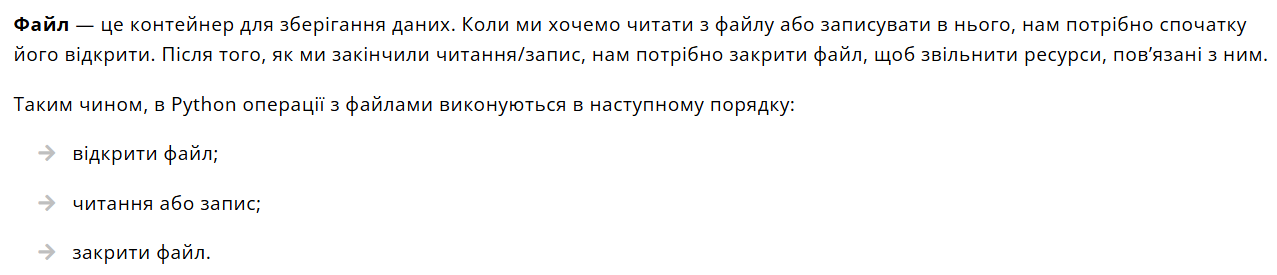

In [ ]:
# Відкриваємо файл у поточному каталозі
file1 = open("test.txt")

In [ ]:
#за замовчування файл відкривається в режимі читання (не можуть бути модифікованими). Код вище рівнозначний наступному:
file1 = open("test.txt", "r")

### Режими роботи з файлами

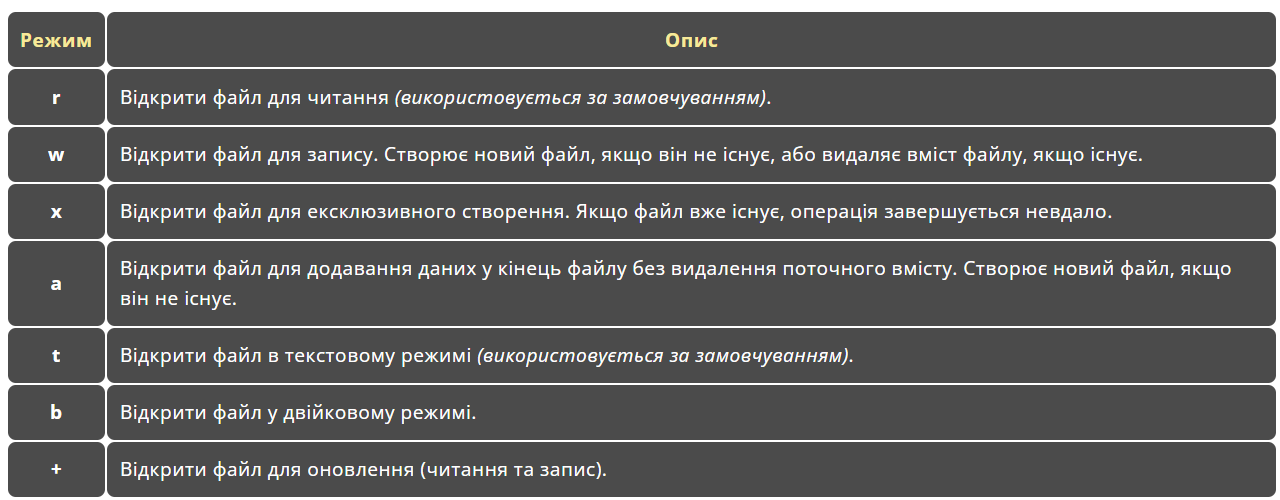

In [ ]:
file1 = open("test.txt")      # рівнозначний 'r' або 'rt'
file1 = open("test.txt", 'w')  # запис у текстовому режимі

# Закриваємо файл - обовязково потрібно для звільнення усіх ресурсів, що повязані з файлом
file1.close()

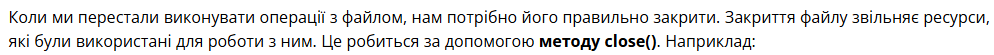

### Читання файлів

In [ ]:
# Відкриваємо файл
file1 = open("test.txt", "r")
 
# Читаємо файл
read_content = file1.read()
print(read_content)
 
# Закриваємо файл - обовязково потрібно для звільнення усіх ресурсів, що повязані з файлом
file1.close()

In [ ]:
#використання разом з конструкцією для обробки вийнятків
try:
    file1 = open("test.txt", "r")
    read_content = file1.read()
    print(read_content)

except:
    pass
 
finally:
    # Закриваємо файл
    file1.close()

### Використання синтаксису with…open

In [ ]:
#синтаксис використовується для автоматичного закриття файлу (рекомендовано щоб не думати про .close())

with open("test.txt", "r") as file1:
    read_content = file1.read()
    print(read_content)

### Запис у файл

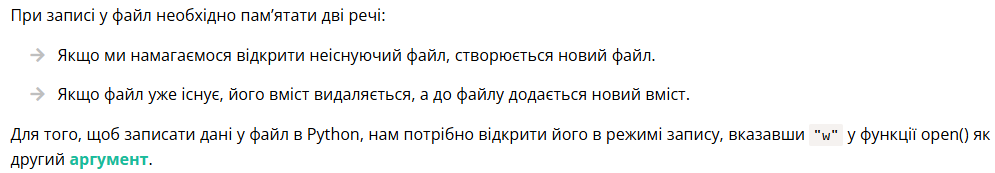

In [ ]:
with open('test_writing.txt', 'w') as file2:
 
    # Виконуємо запис у файл test_writing.txt
    file2.write('I dont want to write files.')
    file2.write('I want data analysis or die.')

Методи для роботи з файлами:

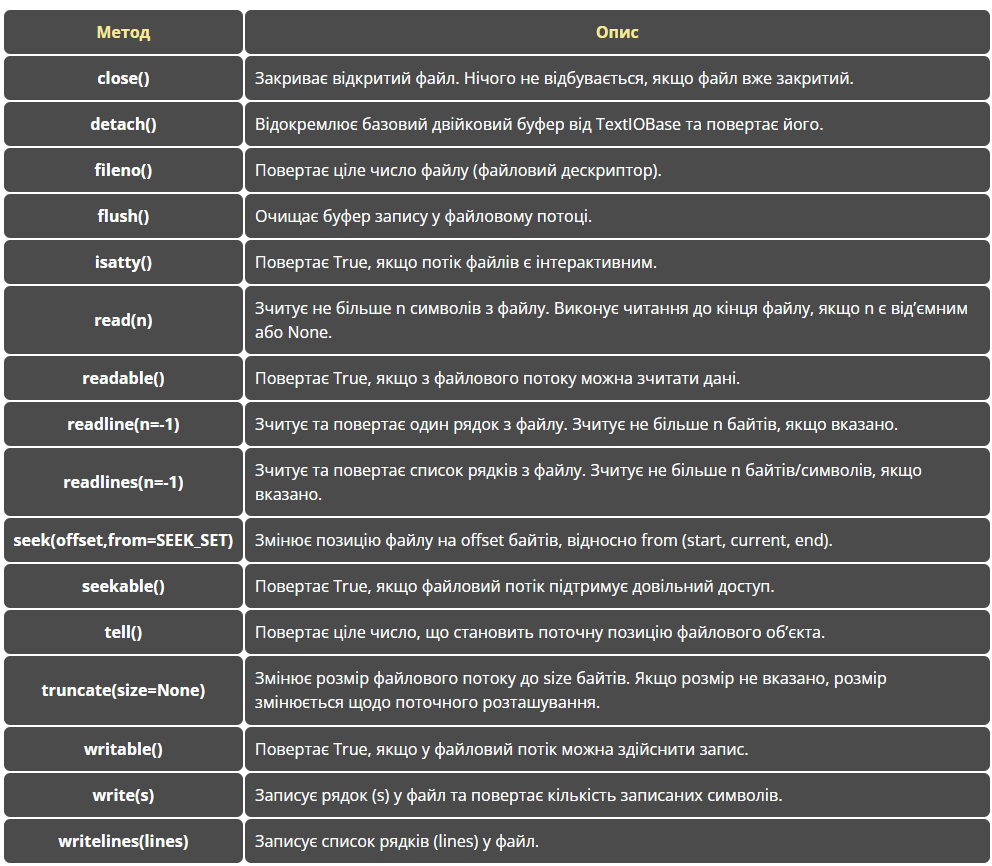

In [ ]:
file_name = 'test_writing.txt'

with open(file_name, 'w') as file:
 
    # Виконуємо запис у файл test_writing.txt
    file.write('I dont want to write files.')
    file.write('I want data analysis or die.')

with open(file_name, 'r') as file:
    for line in file:
        print(line, end = '')

In [ ]:
#використовуємо writelines для того щоб працювати з lists
file_name = 'test_writing_lists.txt'

lines = ['First line\n', 'Second line\n']

with open(file_name, 'w') as file:
    file.writelines(lines)

In [ ]:
#глянути скільки символів записано
file_name = 'test_writing.txt'

with open(file_name, 'w') as file:
 
    # Виконуємо запис у файл test_writing.txt
    its_wrt1 = file.write('I dont want to write files.')
    its_wrt2 = file.write('I want data analysis or die.')
    print(its_wrt1, its_wrt2)

In [ ]:
#чи читабельний файл
file_name = 'test_writing.txt'
f = open(file_name, "r")
print(f.readable())
f.close()

## Робота з каталогами

[Стаття про модуль OS](https://www.w3schools.com/python/module_os.asp)

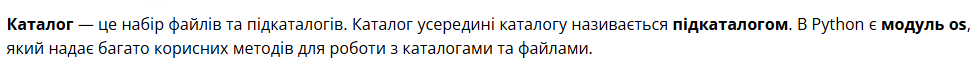



In [ ]:
import os

In [ ]:
#поточний каталог
print(str(os.getcwd()))

In [ ]:
#cписок каталогів та файлів
os.listdir()


In [ ]:
#витягуємо поточний каталог
basepath = os.getcwd()

for entry in os.listdir(basepath):
    if os.path.isfile(os.path.join(basepath, entry)):
        print(entry)

In [ ]:
#different directory
basepath = 'd://Programming/'

for entry in os.listdir(basepath):
    print(entry)
    print(type(entry))
    if os.path.isfile(os.path.join(basepath, entry)):
        print(entry)

In [ ]:
#по модному - https://www.geeksforgeeks.org/python-os-scandir-method/

basepath = 'd://Programming/'
entries = os.scandir(basepath)

In [ ]:
#ітеруємо по обєктам
with os.scandir(basepath) as entries:
    for entry in entries:
        print(type(entry))
        print(entry.name)

In [ ]:
#перевірка що шлях існує
basepath = 'd://Programming/'

if os.path.exists(basepath):
    print('Path is here!')
else:
    print('No path')

In [ ]:
# Вивести всі файли та папки у кореневій папці
basepath = 'd://Programming/'

for root, dirs, files in os.walk(basepath):
    print("Каталог:", root)
    print("Папки:", dirs)
    print("Файли:", files)
    print("-" * 40)

In [ ]:
#створення каталогу
folder_name = 'new_folder'
os.mkdir(folder_name)
 
os.listdir()

In [ ]:
#перейменування каталогу
new_folder_name = 'new_folder_name'
os.rename(folder_name, new_folder_name)

In [ ]:
#видалення файлу

file_to_remove = 'test.txt'
os.remove(file_to_remove)

#видалення порожнього каталогу
os.rmdir(new_folder_name)

#видалення каталогу та усього шо там є
import shutil
 
# Видалення каталогу "mydir" та його вмісту
shutil.rmtree(new_folder_name)

[Почитати про shutil](https://docs.python.org/uk/3.13/library/shutil.html)

## Деякі типи файлів та як ними керувати

### CSV

**CSV (comma-separated value)** - це формат подання табличних даних (наприклад, це можуть бути дані з таблиці або дані з БД).

У цьому форматі кожен рядок файлу – це рядок таблиці. Незважаючи на назву формату, роздільником може бути не тільки кома.

І хоча у форматів з іншим роздільником може бути і власна назва, наприклад, TSV (tab separated values), проте під форматом CSV розуміють, як правило, будь-які роздільники.

In [ ]:
#працюємо зі стандартною бібліотекою csv
import csv

file_name = 'Steel_industry.csv'

#читаємо
with open(file_name) as f:

    #.reader повертає ітератор
    reader = csv.reader(f)
    #print(reader)
    #print(list(reader))

    # отримання заголовків
    #headers = next(reader)
    #print('Headers: ', headers)

    for row in reader:
        print(row)

In [ ]:
#отримати те саме, але у вигляді словників ключ - значення

file_name = 'Steel_industry.csv'

with open(file_name) as f:
    reader = csv.DictReader(f)
    
    for row in reader:
        print(row)

In [ ]:
## запис у файл - масив
data = [
    ['hostname', 'vendor', 'model', 'location'],
    ['sw1', 'Cisco', '3750', 'London, Best str'],
    ['sw2', 'Cisco', '3850', 'Liverpool, Better str'],
    ['sw3', 'Cisco', '3650', 'Liverpool, Better str'],
    ['sw4', 'Cisco', '3650', 'London, Best str']
]

new_file = 'csv_file_writing.csv'

with open(new_file, 'w') as f:
    writer = csv.writer(f)
    for row in data:
        writer.writerow(row)

with open(new_file) as f:
    print(f.read())

In [ ]:
#те саме але коротше
data = [['hostname', 'vendor', 'model', 'location'],
        ['sw1', 'Cisco', '3750', 'London, Best str'],
        ['sw2', 'Cisco', '3850', 'Liverpool, Better str'],
        ['sw3', 'Cisco', '3650', 'Liverpool, Better str'],
        ['sw4', 'Cisco', '3650', 'London, Best str']]


with open(new_file, 'w') as f:
    writer = csv.writer(f, quoting=csv.QUOTE_NONNUMERIC)
    writer.writerows(data)

with open(new_file) as f:
    print(f.read())

#csv.QUOTE_NONNUMERIC - для того щоб усі записи були з кавичками

In [ ]:
# пишемо словник у файл
data = [
    {
        'hostname': 'sw1',
        'location': 'London',
        'model': '3750',
        'vendor': 'Cisco'
    },
    {
        'hostname': 'sw2',
        'location': 'Liverpool',
        'model': '3850',
        'vendor': 'Cisco'
    },
    {
        'hostname': 'sw3',
        'location': 'Liverpool',
        'model': '3650',
        'vendor': 'Cisco'
    },
    {
        'hostname': 'sw4',
        'location': 'London',
        'model': '3650',
        'vendor': 'Cisco'
    }
]

new_file = 'csv_file_writing.csv'

with open(new_file, 'w') as f:
    writer = csv.DictWriter(f, fieldnames = list(data[0].keys()), quoting = csv.QUOTE_NONNUMERIC)
    writer.writeheader()
    for d in data:
        writer.writerow(d) 

In [ ]:
data[0].keys()

In [ ]:
#вказати розділювач
data = [['hostname', 'vendor', 'model', 'location'],
        ['sw1', 'Cisco', '3750', 'London, Best str'],
        ['sw2', 'Cisco', '3850', 'Liverpool, Better str'],
        ['sw3', 'Cisco', '3650', 'Liverpool, Better str'],
        ['sw4', 'Cisco', '3650', 'London, Best str']]

#newline=''
with open(new_file, 'w') as f:
    writer = csv.writer(f, quoting = csv.QUOTE_NONNUMERIC, delimiter = ';')
    writer.writerows(data)

In [ ]:
with open(new_file) as f:
    reader = csv.reader(f, delimiter=';')
    for row in reader:
        print(row)

### JSON

**JSON (JavaScript Object Notation)** – це текстовий формат для зберігання та обміну даними.

JSON синтаксису дуже схожий на Python dictionary і досить зручний для сприйняття.

Як і у випадку з CSV, у Python є модуль, який дозволяє легко записувати та читати дані у форматі JSON.

In [ ]:
import json

#читання
file_name = 'json_test_file.json'

with open(file_name) as f:
    templates = json.load(f)

print(templates)

In [ ]:
type(templates)

In [ ]:
#дивимося вміст
for section, commands in templates.items():
    print(section)
    print('\n'.join(commands))

In [ ]:
#читаємо рядки окремо
with open(file_name) as f:
    file_content = f.read()
    print(file_content)
    templates = json.loads(file_content)

templates

In [ ]:
type(templates)

[Різниця між load і loads](https://www.geeksforgeeks.org/python-difference-between-json-load-and-json-loads/)

In [ ]:
#запис
trunk_template = [
    'switchport trunk encapsulation dot1q', 'switchport mode trunk',
    'switchport trunk native vlan 999', 'switchport trunk allowed vlan'
]

access_template = [
    'switchport mode access', 'switchport access vlan',
    'switchport nonegotiate', 'spanning-tree portfast',
    'spanning-tree bpduguard enable'
]

to_json = {'trunk': trunk_template, 'access': access_template}
json_file_to_write = 'json_test_writing'

with open(f'{json_file_to_write}.json', 'w') as f:
    f.write(json.dumps(to_json))

with open(f'{json_file_to_write}.json') as f:
    file_content = f.read()
    print(file_content)
    templates = json.loads(file_content)

templates

In [ ]:
templates.keys()

In [ ]:
for keys, values in templates.items():
    print(keys)
    for it in values:
        print(' ', it)

### EXCEL
[Почитати можна тут](https://www.geeksforgeeks.org/working-with-excel-spreadsheets-in-python/)

In [ ]:
import xlsxwriter

new_excel_file = 'new_excel_file'

# Створення нового Excel-файлу
workbook = xlsxwriter.Workbook(f'{new_excel_file}.xlsx')
worksheet = workbook.add_worksheet()

# Запис даних у комірки
worksheet.write('A1', 'Hello')
worksheet.write('B1', 'World')

# Закриття файлу
workbook.close()
print("Excel-файл успішно створено!")

In [ ]:
workbook = xlsxwriter.Workbook(f'{new_excel_file}_formatted.xlsx')
worksheet = workbook.add_worksheet()

# Формати
bold = workbook.add_format({'bold': True})  # Жирний текст
italic = workbook.add_format({'italic': True})  # Курсив
number_format = workbook.add_format({'num_format': '#,##0.00'})  # Числовий формат

# Запис із форматами
worksheet.write('A1', 'Bold Text', bold)
worksheet.write('A2', 'Italic Text', italic)
worksheet.write('A3', 12345.678, number_format)

workbook.close()
print("Excel-файл із форматуванням створено!")

In [ ]:
#читаємо з масиву
data = [
    ['Order ID', 'Customer ID', 'Amount'],
    [101, 12345, 250.5],
    [102, 12346, 300.0],
    [103, 12347, 400.75]
]

workbook = xlsxwriter.Workbook(f'{new_excel_file}_from_mass.xlsx')
worksheet = workbook.add_worksheet()

# Запис таблиці
for row_idx, row_data in enumerate(data):
    for col_idx, value in enumerate(row_data):
        worksheet.write(row_idx, col_idx, value)

workbook.close()
print("Excel file from array was created!")

In [ ]:
#можна зробити формулу
orkbook = xlsxwriter.Workbook(f'{new_excel_file}_adding_formula.xlsx')
worksheet = workbook.add_worksheet()

# Дані
worksheet.write('A1', 10)
worksheet.write('A2', 20)
worksheet.write('A3', 30)

# Формула
worksheet.write('A4', '=SUM(A1:A3)')  # Сума значень у діапазоні A1:A3

workbook.close()
print("Excel file with formula was created!")

In [ ]:
#хочемо вставити графічек
workbook = xlsxwriter.Workbook(f'{new_excel_file}_adding_chart.xlsx')
worksheet = workbook.add_worksheet()
chart = workbook.add_chart({'type': 'line'})

# Дані
data = [10, 20, 30, 40, 50]
worksheet.write_column('A1', data)

# Додаємо дані до графіка
chart.add_series({'values': '=Sheet1!$A$1:$A$5'})

# Вставляємо графік у файл
worksheet.insert_chart('C1', chart)

workbook.close()
print("Excel file with chart was created!")

## Вступ до Pandas

**pandas** — програмна бібліотека, написана для мови програмування Python для маніпулювання даними та їхнього аналізу. Вона, зокрема, пропонує структури даних та операції для маніпулювання чисельними таблицями та часовими рядами. 

Для чого потрібна:
- Об'єкт DataFrame із вбудованим індексуванням для маніпулювання даними.
- Інструменти для зчитування та записування даних між структурами даних у пам'яті та різними форматами файлів.
- Вирівнювання даних та вбудована підтримка пропущених даних.
- Переформатовування для отримання зведених наборів даних.
- Отримання зрізів за мітками, індексування з розширеними можливостями[5] та отримання піднаборів з великих наборів даних.
- Вставляння та вилучення стовпчиків у структурах даних.
- Рушій групування, що дозволяє робити з наборами даних операції розділення-зміни-об'єднання (англ. split-apply-combine).
- Злиття та з'єднання наборів даних.
- Ієрархічне індексування осей для роботи з даними високої вимірності в структурі даних нижчої вимірності.
- Функціональність для часових рядів: породження діапазонів дат та перетворення частоти, статистики рухливого вікна, лінійні регресії рухливого вікна, зсування дат та запізнювання.
- Стилізація та виведення агрегацій
- І багато-багато іншого

[Офіційний ресурс з документацією](https://pandas.pydata.org/docs/index.html)

### Ключові поняття

- **DataFrame** - це двовимірний масив із позначеною структурою даних, яка має різні типи стовпців. DataFrame — це стандартний спосіб зберігання даних у табличному форматі з рядками для зберігання інформації та стовпцями для імен інформації.є
- **Series** - це одновимірна структура даних. Він може мати будь-яку структуру даних, як-от ціле число, число з плаваючою точкою та рядок. Це корисно, коли потрібно виконати обчислення або повернути одновимірний масив. Серія, за визначенням, не може мати кілька стовпців. Що може містити серіал:

In [ ]:
#%pip install pandas

In [ ]:
#імпортуємо бібліотеку і читаємо csv

import pandas as pd

data = pd.read_csv('tipsdataset.csv')
data

In [ ]:
display(data.head(5))
display(data.tail(5))

In [ ]:
#характеристики датафрейму
data.shape

In [ ]:
data.info()

In [ ]:
data.dtypes

In [ ]:
data.describe().T

#щоб включити не тільки числові дані
#data.describe(include = 'all').T

In [ ]:
data.columns

In [ ]:
#витягнути атрибут

#створити атрибут

#видалити атрибут

#перейменування

#копіювання

### Індексація 

Кожен рядок об'єкта DataFrame або значення Series має **індекс**. Індекс може бути як числом, і рядком. Список індексів об'єктів DataFrame та Series можна отримати за допомогою атрибуту index:

Методи отримання індексу:
- **loc()** — метод вибору даних на основі міток рядків
- **iloc()** — метод вибору рядків відповідно до їх числової позиції

In [ ]:
data.index

In [ ]:
new_data = data.loc[:10]

In [ ]:
new_data = data.iloc[:10]
new_data

In [ ]:
#слайси
data.iloc[5:15]

In [ ]:
data.iloc[5:15]

In [ ]:
# операції з атрибутами

In [ ]:
data['smoker'].value_counts()

In [ ]:
data['time'].value_counts()

In [ ]:
#видалення датафрейму
del data

https://learn.microsoft.com/ru-ru/sql/connect/python/pyodbc/python-sql-driver-pyodbc?view=sql-server-ver16

In [ ]:
#один із варіантів завантаження з SQL Server
import pyodbc
import pandas as pd
# Some other example server values are
# server = 'localhost\sqlexpress' # for a named instance
# server = 'myserver,port' # to specify an alternate port
server = 'localhost\sqlexpress01' 
database = 'BikeStores' 
username = 'yourusername' 
password = 'databasename'  
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';') #UID='+username+';PWD='+ password

cursor = cnxn.cursor()
# select 26 rows from SQL table to insert in dataframe.
query = 'select top(100) * from BikeStores.sales.customers'
df = pd.read_sql(query, cnxn)
print(df.head(26))